# Header

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import spinmob as s
from scipy import sparse
import os
from mpl_toolkits import mplot3d
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# check directory
os.chdir("D:\Raphael\Dropbox\Mcgill\JupyterNotebook\PHYS512")
os.getcwd()

'D:\\Raphael\\Dropbox\\Mcgill\\JupyterNotebook\\PHYS512'

# Problem 1
Earlier in the course, I claimed that the leapfrog scheme preserves energy. Show that this is true as long as the CFL condition is satisfied. Recall that the leapfrog scheme is:
    $$ \frac{f(t + dt, x) − f(t − dt, x)}{2dt} = -v \frac{f(t, x + dx) − f(t, x − dx)}{2dx}$$
In particular, we use calculate the spatial derivative at a point halfway between the times at which we evaluate the solution. You may assume the solution will look something like $f(x, t) = ξ^t \exp(ikx)$ where in general ξ will be complex and a function of k.

Using $f(x, t) = ξ^t \exp(ikx)$:
$$ \frac{f(t + dt, x) − f(t − dt, x)}{2dt} = -v \frac{f(t, x + dx) − f(t, x − dx)}{2dx}$$
$$ \frac{ξ(k)^{t + dt} \exp(ikx) − ξ(k)^{t - dt} \exp(ikx)}{2dt} = -v \frac{ξ(k)^t \exp(ik(x + dx)) − ξ(k)^t \exp(ik(x - dx))}{2dx}$$
$$ \frac{ξ(k)^t ξ(k)^{dt} \exp(ikx) − ξ(k)^t ξ(k)^{-dt} \exp(ikx)}{2dt} = -v \frac{ξ(k)^t \exp(ikx)\exp(ikdx) − ξ(k)^t \exp(ikx)\exp(-ikdx)}{2dx}$$
$$ \frac{ξ(k)^t \exp(ikx) (ξ(k)^{dt} − ξ(k)^{-dt})}{2dt} = -v \frac{ξ(k)^t \exp(ikx)(\exp(ikdx) − \exp(-ikdx))}{2dx}$$
$$ \frac{ξ(k)^{dt} − ξ(k)^{-dt}}{dt} = -v \frac{\exp(ikdx) − \exp(-ikdx)}{dx}$$
$$  \frac{vdt}{dx} = -\frac{ξ(k)^{dt} − ξ(k)^{-dt}}{\exp(ikdx) − \exp(-ikdx)}$$
$$  \frac{vdt}{dx} = -\frac{ξ(k)^{dt} − ξ(k)^{-dt}}{2i\sin(kdx)}$$
$$  \frac{vdt}{dx} = \frac{i(ξ(k)^{dt} − ξ(k)^{-dt})}{2\sin(kdx)}$$

Generalizing $ξ(k)$ as $r\exp(ik)$:

$$  \frac{vdt}{dx} = \frac{i(r\exp(ikdt) − r\exp(-ikdt))}{2\sin(kdx)}$$
$$  \frac{vdt}{dx} = \frac{ir(2i \sin(kdt)}{2\sin(kdx)}$$
$$  \frac{vdt}{dx} = \frac{-r\sin(kdt)}{\sin(kdx)}$$

Since $dt$ and $dx$ are small and positive, we know $\sin(kdt)/\sin(kdx)$ is always positive. Thus the right side would always be negative, thus always smaller than 1, thus the CFL condition is satisfied.
$$  \frac{vdt}{dx} \leq 1$$

# Problem 2
Let’s use conjugate gradient to solve Laplace’s equation with boundary conditions using Green’s functions. With a little cleverness, we can actually do this without needing to set an exterior boundary. For
speed, let’s do this in two dimensions. 

**Part a**: First, we’ll figure out what V (r) looks like from a point charge. Remember that a 2D point charge looks like a 3D line charge and so will have a log behavior rather than 1/r. We also need to be careful about the singularity at 0. While this can actually be written down properly with some effort, a much easier trick is to note that away from the origin, each
point is the average of its neighbors. By knowing the potential at (1,0) has to be the average of its neighbors, we can work out the potential at the origin. We’ll ignore $\epsilon_0$ and set ρ to be the potential minus the average of neighbors. If you rescale your potential so that ρ[0, 0] = 1 and V [0, 0] = 1 (recall that we can add an arbitrary offset to a potential without affecting the physics of the situation), what is the potential V [1, 0] and V [2, 0]? To sanity check your answer, the potential V [5, 0] should be around -1.16.

In [100]:
# First let's define a general potential function:
def V(x,y,k=1):
    r = np.sqrt(x**2 + y**2)
    return k*np.log(r)

 => V(0,0) before scaling:
V(0,0) =  -1.3862943611198908
 => Scaling factor:
R =  -0.7213475204444816
 => V(0,0) after scaling:
V(0,0) =  1.0
 --- 
 => Sanity check: V(5,0) = -1.16 
V(5,0) =  -1.1609640474436809
 --- 
 => Plotting for visual check


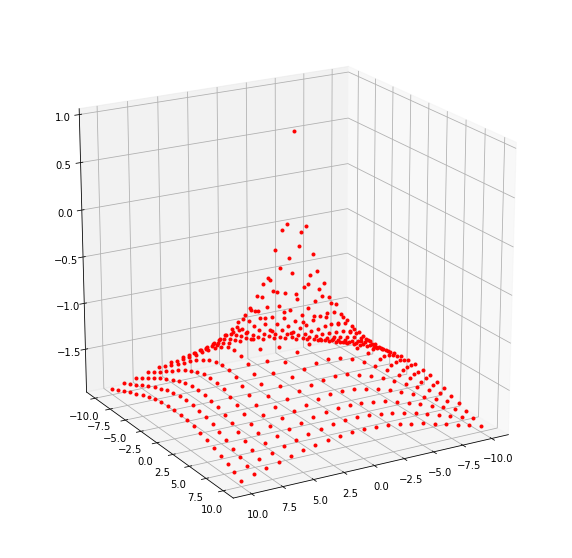

In [101]:
# Creating a matrix of element around (0,0):
size = 10
V_m = np.zeros(shape=(2*size+1,2*size+1,3))
for i in range(2*size+1):
    for j in range(2*size+1):
        V_m[i-size,j-size] = [i-size,j-size,V(i-size,j-size)]

#Averaging to obtain V_m(0,0)
V_m[0,0][2] = 4*V_m[1,0][2] - (V_m[1,1][2] + V_m[1,-1][2] + V_m[2,0][2])
print(" => V(0,0) before scaling:")
print("V(0,0) = ",V_m[0,0][2])

#Obtaining Rescaling factor R s.t. V_m(0,0)=1 
R = 1/V_m[0,0][2]
print(" => Scaling factor:")
print("R = ",R)

#Rescaling V_m according to R
for i in range(2*size+1):
    for j in range(2*size+1):
        V_m[i,j][2] = V_m[i,j][2] * R
print(" => V(0,0) after scaling:")
print("V(0,0) = ",V_m[0,0][2])
        
        
#Sanity Check
print(" --- ")
print(" => Sanity check: V(5,0) = -1.16 ")
print("V(5,0) = ", V_m[5,0][2])
     
print(" --- ")
print(" => Plotting for visual check")

#plot in a 3D plot
V_m_plot = np.zeros(shape = ((2*size+1)**2,3)) #Make V_m convinient for plotting.
n = 0
for i in range(2*size+1):
    for j in range(2*size+1):
        V_m_plot[n] = V_m[i-size,j-size]
        n = n+1

x= np.transpose(V_m_plot)[0]
y= np.transpose(V_m_plot)[1]
z= np.transpose(V_m_plot)[2]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x,y,z,"r.")
ax.view_init(20, 60)

**Part b**: Now that we know what the potential from a point charge is, we can calculate the potential everywhere in space from an arbitrary charge distribution by convolving the charge by our hard-won but eternal Green’s function. We can write this as V = G ~ ρ. where G is the Green’s function. Even though we don’t usually think of it that way, this is indeed a matrix
equation and so can be solved using conjugate-gradient (or any other tool you care to use). In this case, though, we start with the potential on some surfaces, and want to find the charge distribution on those same surfaces. Write a conjugate-gradient solver that solves for ρ on a mask given V on that mask. Use your solver to find the charge on a square box held at a potential of 1. Plot the charge density along one side of the box

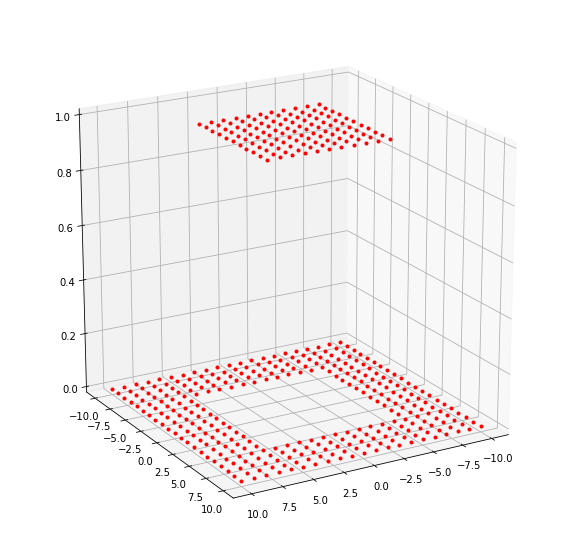

In [102]:
# define square box:
def sq_box(side=5,size=10):
    assert side<size
    box = np.zeros(shape=(2*size+1,2*size+1,3))
    for i in range(2*size+1):
        for j in range(2*size+1): 
            if np.abs(i-size) <= side and np.abs(j-size) <= side:
                box[i,j] = [i-size,j-size,1]
            else:
                box[i,j] = [i-size,j-size,0]
    return box

box = sq_box()

#plot in a 3D plot to check box
box_plot = np.zeros(shape = ((2*size+1)**2,3)) #Make V_m convinient for plotting.
n = 0
for i in range(2*size+1):
    for j in range(2*size+1):
        box_plot[n] = box[i-size,j-size]
        n = n+1

x= np.transpose(box_plot)[0]
y= np.transpose(box_plot)[1]
z= np.transpose(box_plot)[2]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x,y,z,"r.")
ax.view_init(20, 60)

In [ ]:
def simple_cg(x,b,A,n=20):
    r = b-np.dot(A,x)
    p=r.copy()
    x=0
    rTr = np.dot(r,r)
    for iter in range(n):
        print("inter is",iter,"with residual",rTr)
        Ap =np.dot(A,p)
        pAp = np.dot(p,Ap)
        alpha = np.dot(r,r)/pAp
        x = x + alpha*p
        r_new=r-alpha*Ap
        rTr_new=np.dot(r_new,r_new)
        beta=rTr_new/rTr
        p = r_new+beta*p
        r=r_new
        rTr=rTr_new
    return x

In [53]:
# Green's Function is V(r) for a point charge
G = np.zeros(shape=(2*size+1,2*size+1))
for i in range(2*size+1):
    for j in range(2*size+1):
        G[i-size,j-size] = V_m[i-size,j-size][2]

In [59]:
Box = np.zeros(shape=(2*size+1,2*size+1))
for i in range(2*size+1):
    for j in range(2*size+1):
        Box[i-size,j-size] = sq_box()[i-size,j-size][2]

In [104]:
GT = np.transpose(G)
A = np.dot(GT,G)
b = np.dot(GT,Box)
p = b*0
#p = simple_cg(p,b,A,n=10)


**Part c**: Now that you have the charge, show the potential everywhere in space. How close to constant is the potential in the interior of the box? Now plot the x− and y−components of the field just outside the box. Do they agree with what you expect? As a reminder, the boundary conditions are that the field is perpendicular to any equipotential, and that standard lore says that fields are stronger near points.

**Final Comments**: The easiest way to solve this is to find the potential everywhere in space and then read it out along the mask. For relativey small masks, though, there’s no guarantee that this is the fastest way - a brute force summation may win in some cases. Also note that we got away with not having to specify an outer boundary condition. As long as you pulled a large enough region that the potential from your boundaries doesn’t wrap around onto itself (if you’re using an FFT) then there’s no
edge where boundaries are specified. This is generally a good thing, since our usual state of affairs is not to be sitting near the center of a grounded, conducting box. Finally, you may have noticed that I played a bit fast and loose with zero points. In 3D, it’s perfectly sensible to set the potential at infinity to zero, but we can’t do that in 2D since ln(x) unhappily diverges at both large and small x. In some sense then “hold a box at fixed potential” doesn’t even make sense (fixed relative to what?). However, by setting the potential of our Green’s function to 1 at the center, we have implicitly set a zero point.